In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
# subject 0, night 0
file = "sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# metadata
info = data.info
channels = data.ch_names
print("Metadata: \n ", data)
print(info)
print("Channels: ", channels)
#print("raw_data size: ", raw_data.shape)
# extract each channel
EEG_Cz = raw_data[0] * 1000000
EEG_Oz = raw_data[1] * 1000000
EOG = raw_data[2] * 1000000
Resp = raw_data[3]
EMG = raw_data[4]
Temp = raw_data[5]
Event = raw_data[6]
sf = 100.
time = np.arange(EEG_Cz.size) / sf

Extracting EDF parameters from c:\Users\flake\Documents\Homework\CSCI5622\Project Work\sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Metadata: 
  <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
Channels:  ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [5]:
#df

array([[ 0.00000000e+00, -2.46739927e+00],
       [ 1.00000000e-02,  1.46739927e+00],
       [ 2.00000000e-02, -4.09890110e+00],
       ...,
       [ 9.99700000e+01,  6.26593407e+00],
       [ 9.99800000e+01,  7.51355311e+00],
       [ 9.99900000e+01,  7.32161172e+00]])

In [7]:
#import csv

In [16]:
#i = 0
#with open('night_for_R.csv', 'w', newline='') as csvfile:
#    spamwriter = csv.writer(csvfile, delimiter=',')
#    for i in range(df.shape[0]):
#        spamwriter.writerow([EEG_Cz[i], EEG_Oz[i],EOG[i]])
#        i = i+1

In [4]:
mod = GaussianProcessRegressor()
n = 10000
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,1))
for i in range(n):
    Y[i]=EEG_Oz[i]
df = np.concatenate((X,Y),axis=1)

In [4]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [5]:
def Rsquared(true, pred):
    num = []
    den = []
    meann = np.mean(true)
    for i in range(len(true)):
        num.append((true[i]-pred[i])**2)
        den.append((true[i]-meann)**2)
    return 1 - sum(num)/sum(den)

In [6]:
actual_training_data, validation_data = train_test_split(training_data, test_size=0.2, random_state=25)

In [11]:
print(actual_training_data.shape)
print(validation_data.shape)
print(testing_data.shape)

(6400, 2)
(1600, 2)
(2000, 2)


In [41]:
a = -14
b = -7
step_per_unit = 6
alphas = [10**(i/step_per_unit) for i in range(int(a*step_per_unit),int(b*step_per_unit))]
training_performance = []
validation_performance = []
for i in alphas:
    mod = GaussianProcessRegressor(alpha=i)
    mod.fit(actual_training_data[:,0].reshape(-1,1),actual_training_data[:,1]) 
    y_hat = mod.predict(actual_training_data[:,0].reshape(-1,1))
    training_performance.append(Rsquared(actual_training_data[:,1],y_hat))
    y_hat = mod.predict(validation_data[:,0].reshape(-1,1))
    validation_performance.append(Rsquared(validation_data[:,1],y_hat))
    print(i)

1e-14
1.4677992676220677e-14
2.1544346900318866e-14
3.1622776601683796e-14
4.6415888336127726e-14
6.812920690579622e-14
1e-13
1.4677992676220675e-13
2.1544346900318868e-13
3.162277660168379e-13
4.641588833612772e-13
6.812920690579622e-13
1e-12
1.4677992676220676e-12
2.1544346900318868e-12
3.1622776601683794e-12
4.6415888336127725e-12
6.8129206905796225e-12
1e-11
1.4677992676220676e-11
2.1544346900318868e-11
3.1622776601683794e-11
4.641588833612773e-11
6.812920690579622e-11
1e-10
1.4677992676220674e-10
2.1544346900318867e-10
3.1622776601683795e-10
4.6415888336127727e-10
6.812920690579622e-10
1e-09
1.4677992676220676e-09
2.1544346900318866e-09
3.1622776601683795e-09
4.641588833612773e-09
6.812920690579622e-09
1e-08
1.4677992676220705e-08
2.1544346900318822e-08
3.162277660168379e-08
4.641588833612782e-08
6.812920690579608e-08


Text(0.5, 0, 'Alpha value')

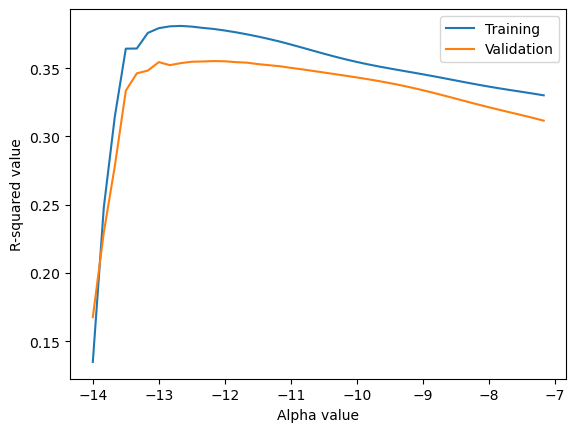

In [42]:
l_alphas = [np.log10(a) for a in alphas]
plt.plot(l_alphas, training_performance)
plt.plot(l_alphas, validation_performance)
plt.legend(['Training','Validation'])
plt.ylabel('R-squared value')
plt.xlabel('Alpha value')

In [35]:
import csv

In [40]:
with open('big_gaussian.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(l_alphas)):
        spamwriter.writerow([l_alphas[i], training_performance[i], validation_performance[i]])